## Heston Model
This notebook uses the model `finmc.models.heston.hestonMC` and shows how to
- create dataset for this model
- use `finmc` calcs to plot asset evolution and implied vol.

In [9]:
import numpy as np
import pandas as pd

from finmc.calc.impliedvol import iv_surface_mc, atmvols_mc
from finmc.models.heston import HestonMC
from finmc.plots.asset import plot_asset
from finmc.plots.impliedvol import plot_iv, plot_atmvols
from finmc.utils.assets import flat_discount, flat_fwds

Create dataset for this model. See [Heston Model Documentation](https://finlib.github.io/finmc/models/heston/) for explanation of model parameters.

In [2]:
asset_name = "SPX"
spot = 2900
rate = 0.02

dataset = {
    "MC": {"PATHS": 100_000, "TIMESTEP": 1 / 250, "SEED": 1},
    "BASE": "USD",
    "ASSETS": {
        "USD": flat_discount(rate, 3.0),
        asset_name: flat_fwds(spot, rate, 0.0, 3.0),
    },
    "HESTON": {
        "ASSET": asset_name,
        "INITIAL_VAR": 0.02,
        "LONG_VAR": 0.04,
        "VOL_OF_VOL": 0.45,
        "MEANREV": 1.5,
        "CORRELATION": -0.85,
    },
}

In [3]:
# create the model
model = HestonMC(dataset)

### Evolution of the asset.

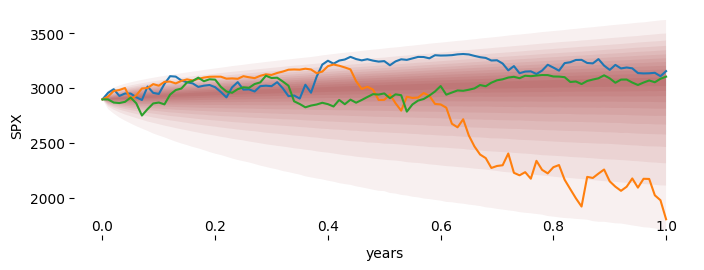

In [4]:
plot_asset(model, asset_name)

### Plot the Implied Volatility Surface

In [21]:
# Calculate the implied volatility surface
strikes = np.linspace(2000, 3400, 15)
expirations = np.array([1 / 12, 1 / 6, 1 / 4, 1 / 2, 1])
surface = iv_surface_mc(
    strikes,
    expirations,
    asset_name="SPX",
    model=model,
)
# Surface is a 2D numpy array. print as dataframe
pd.DataFrame(surface, columns=strikes, index=expirations)

,2000.0,2100.0,2200.0,2300.0,2400.0,2500.0,2600.0,2700.0,2800.0,2900.0,3000.0,3100.0,3200.0,3300.0,3400.0
0.083333,NaN,NaN,NaN,NaN,NaN,0.206902,0.193685,0.178404,0.161627,0.142561,0.119097,0.098219,NaN,NaN,NaN
0.166667,NaN,NaN,NaN,0.232163,0.219587,0.206687,0.193277,0.178481,0.162159,0.143293,0.121446,0.100841,NaN,NaN,NaN
0.250000,NaN,0.253861,0.242128,0.230738,0.218795,0.206122,0.192529,0.178155,0.162322,0.144620,0.124825,0.105323,0.093945,NaN,NaN
0.500000,0.262860,0.251337,0.239682,0.227862,0.215795,0.203610,0.191135,0.178032,0.164108,0.149397,0.133924,0.118296,0.104519,0.095958,0.091733
1.000000,0.247858,0.237900,0.228101,0.218221,0.208274,0.198290,0.188168,0.177950,0.167544,0.157010,0.146356,0.135694,0.125231,0.115499,0.107384


Plot now.

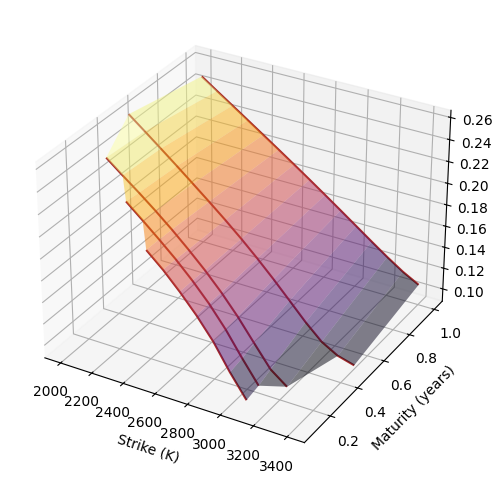

In [18]:
plot_iv(strikes, expirations, surface)

### Plot ATM Volatilities

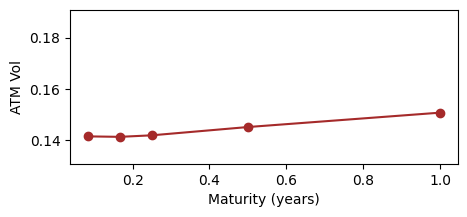

In [7]:
atmvols, fwds = atmvols_mc(
    expirations,
    asset_name="SPX",
    model=model,
)
plot_atmvols(expirations, atmvols)